# hw1


In [87]:
import numpy as np
from numpy import *
import math
import random
import matplotlib.pyplot as plt

## Q1

Write a function `Print_values` with arguments a, b, and c to reflect the following flowchart. Here the purple parallelogram operator on a list [x, y, z] is to compute and print `x+y-10z`. Try your output with some random a, b, and c values. Report your output when a = 10, b = 5, c = 1.

In [70]:
def Print_values(a,b,c):
    temp =[a,b,c]
    if a>b:
        if b>c:
            temp =[a,b,c]
        elif a>c:
            temp =[a,c,b]
        else:
            temp =[c,a,b]
    elif b>c:
        if a>c:
            temp =[a,c,b]
        else:
            temp =[c,a,b]
    else:
        temp =[c,b,a]

    return temp[0]+temp[1]-10*temp[2]


In [71]:
a,b,c =10,5,1
print(Print_values(a,b,c))

5


## Q2

Given a list with N positive integers. For every element x of the list, find the value of continuous ceiling function defined as `F(x) = F(ceil(x/3)) + 2x`, where F(1) = 1.

In [72]:
def celing(x):
    if x ==1:
        return 1
    return celing(math.ceil(x/3))+2*x


In [75]:
N =input("input a list of positive intergers of x: ").split(',')
res =[]
for x in N:
    if x.isdigit() and int(x)>0:
        res.append(celing(int(x)))
    else:
        print('please input positive intergers')
        break

print('input:',N,'\n','output:',res)


input: ['1', '3', '7', '14', '18', '22', '46', '72', '89'] 
 output: [1, 7, 21, 43, 53, 67, 141, 215, 271]


## Q3
### 3.1
Given 10 dice each with 6 faces, numbered from 1 to 6. Write a function `Find_number_of_ways` to find the number of ways to get sum x, defined as the sum of values on each face when all the dice are thrown.

> https://www.geeksforgeeks.org/dice-throw-dp-30/
>#### eg
> **10次**丢出和**15**的次数 = 第**9**次丢出和分别为[9，10，11，12，13，14]的总和，同样的，第**9**次里丢出和**14**的次数 =第**8**次丢出和为[8，9，10，11，12，13]的总和，以此递推

In [76]:
def Find_number_of_ways(x):
    table=[[0]*(x+1) for i in range(11)]
    if x < 10 or x > 60:
        return 'please input within right range~'
    
    for j in range(1,min(7,x+1)):
        table[1][j]=1
    for i in range(2,11):
        for j in range(1,x+1):
            for k in range(1,min(7,j)):
                table[i][j]+=table[i-1][j-k]

    return table[-1][-1]

In [77]:
X3 =int(input("input the sum(range from 10 to 60): "))
print('input:',X3,'\n','output:',Find_number_of_ways(X3))

input: 32 
 output: 3801535


### 3.2
Count the number of ways for any x from 10 to 60, assign the number of ways to a list called `Number_of_ways`, so which x yields the maximum of `Number_of_ways`?

In [78]:
Number_of_ways =[]
for i in range(10,61):
    Number_of_ways.append(Find_number_of_ways(i))

print('The value',Number_of_ways.index(max(Number_of_ways))+1,'yields the maximum of Number of ways')

The value 26 yields the maximum of Number of ways


## Q4

### 4.1
Write a function `Random_integer` to fill an array of N elements by randomly selecting integers from 0 to 10.

In [80]:
def Random_integer(N):
    return np.random.randint(11, size =N)

print('randomly create a list :',Random_integer(5))

randomly create a list : [ 6 10  0  7  9]


### 4.2
Write a function `Sum_averages` to compute the sum of the average of all subsets of the array. For example, given an array of [1, 2, 3], you `Sum_averages` function should compute the sum of: average of [1], average of [2], average of [3], average of [1, 2], average of [1, 3], average of [2, 3], and average of [1, 2, 3].


In [81]:
from numpy import *

def Sum_averages(nums):
    res = [[]]
    avg =[]
    for i in range(len(nums)):
        temp = []
        for j in range(len(res)):
            temp.append(res[j] + [nums[i]])
            avg.append(mean(temp[j]))
        res += temp
    return sum(avg)

In [82]:
nums =list(map(int,input("input the list of values: ").split(',')))
print('input:',nums,'\n','output:',Sum_averages(nums))

input: [1, 2, 3, 4, 5, 6, 7, 8, 9] 
 output: 2555.0


### 4.3
Call `Sum_averages` with N increasing from 1 to 100, assign the output to a list called `Total_sum_averages`. Plot `Total_sum_averages`, describe what do you see.

In [86]:
Total_sum_averages =[]
for i in range(1,21):
    temp =Random_integer(i)
    Total_sum_averages.append(Sum_averages(temp))

print('the mean of total number of paths from the 20 runs is:\n',mean(Total_sum_averages))

the mean of total number of paths from the 20 runs is:
 530279.2800440275


Text(0, 0.5, 'total sum averages')

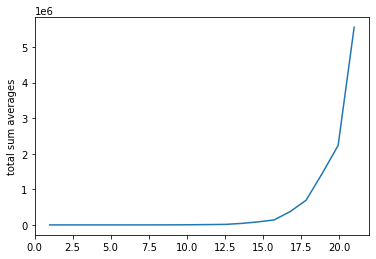

In [101]:
h =np.linspace(1,21,20)
plt.plot(h,Total_sum_averages)
plt.ylabel('total sum averages')

## 5. Path counting

### 5.1
Create a matrix with N rows and M columns, fill the right-bottom corner and top-left corner cells with 1, and randomly fill the rest of matrix with integer 0 or 1.

In [102]:
import numpy as np

def create_matrix(N,M):
    temp =np.random.randint(0,2,(N,M))
    temp[0,0] =1
    temp[N-1,M-1] =1
    return temp

In [104]:
mat =list(map(int,input("create a matrix with N rows and M columns: ").split(',')))
ran_mat =create_matrix(mat[0],mat[1])
print("The new matrix is: \n",ran_mat)

The new matrix is: 
 [[1 1 0 ... 0 0 1]
 [1 0 1 ... 1 0 1]
 [1 0 1 ... 0 0 1]
 ...
 [1 0 1 ... 1 1 0]
 [0 0 1 ... 1 0 0]
 [0 0 1 ... 1 1 1]]


### 5.2
Consider a cell marked with 0 as a blockage or dead-end, and a cell marked with 1 is good to go. Write a function `Count_path` to count total number of paths to reach the right-bottom corner cell from the top-left corner cell.

In [106]:
def Count_path(i,j,row,col,A):
    if i ==row or j ==col:
        return 0

    if A[i][j] ==0:
        return 0
    
    if i ==row-1 and j ==col-1:
        return 1

    return Count_path(i+1, j, row, col, A)+Count_path(i, j+1,row, col, A)

### 5.3
Let N = 10, M = 8, run Count_path for 1000 times, each time the matrix (except the right-bottom corner and top-left corner cells, which remain being 1) is re-filled with integer 0 or 1 randomly, report the mean of total number of paths from the 1000 runs.

In [108]:
paths =[]
for i in range(1001):
    A =create_matrix(10,8)
    paths.append(Count_path(0,0,10,8,A))

print('the mean of total number of paths from the 1000 runs is: ',mean(paths))


the mean of total number of paths from the 1000 runs is:  0.3596403596403596
